In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

2026-02-05 15:54:45.248148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770306885.471315      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770306885.540936      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770306886.110384      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770306886.110416      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770306886.110419      55 computation_placer.cc:177] computation placer alr

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 216s 1us/step


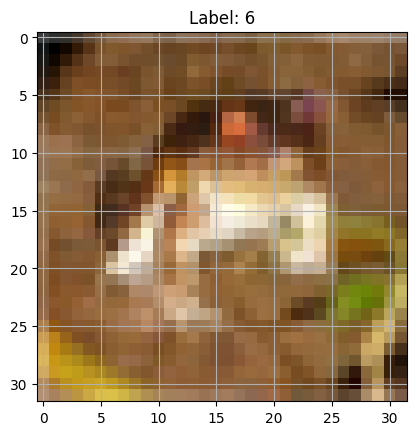

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
image=x_train[0]
label=y_train[0][0]
plt.imshow(image)
plt.title(f"Label: {label}")
plt.grid('off')
plt.show()

In [3]:
data_augmentation=tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.RandomCrop(32,32),
        tf.keras.layers.RandomRotation(0.05),
    ]
)

I0000 00:00:1770307118.071766      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1770307118.077941      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
from tensorflow.keras.layers import (
   GlobalAveragePooling2D
)
from tensorflow.keras.regularizers import l2

In [6]:
def model(input_shape):
    input_img=tf.keras.Input(shape=input_shape)
    x=data_augmentation(input_img)
    Z1=tf.keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='same')(x)
    B1=tf.keras.layers.BatchNormalization()(Z1)
    A1=tf.keras.layers.ReLU()(B1)
    Z2=tf.keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='same')(A1)
    B2=tf.keras.layers.BatchNormalization()(Z2)
    A2=tf.keras.layers.ReLU()(B2)
    P1=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(A2)

    Z3=tf.keras.layers.Conv2D(filters=128,kernel_size=3,strides=(1,1),padding='same')(P1)
    B3=tf.keras.layers.BatchNormalization()(Z3)
    A3=tf.keras.layers.ReLU()(B3)
    Z4=tf.keras.layers.Conv2D(filters=128,kernel_size=3,strides=(1,1),padding='same')(A3)
    B4=tf.keras.layers.BatchNormalization()(Z4)
    A4=tf.keras.layers.ReLU()(B4)
    P2=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(A4)
    
    Z5=tf.keras.layers.Conv2D(filters=256,kernel_size=3,strides=(1,1),padding='same')(P2)
    B5=tf.keras.layers.BatchNormalization()(Z5)
    A5=tf.keras.layers.ReLU()(B5)
    Z6=tf.keras.layers.Conv2D(filters=256,kernel_size=3,strides=(1,1),padding='same')(A5)
    B6=tf.keras.layers.BatchNormalization()(Z6)
    A6=tf.keras.layers.ReLU()(B6)
    Z7=tf.keras.layers.Conv2D(filters=256,kernel_size=3,strides=(1,1),padding='same')(A6)
    B7=tf.keras.layers.BatchNormalization()(Z7)
    A7=tf.keras.layers.ReLU()(B7)
    P3=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(A7)

    Z8=tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=(1,1),padding='same')(P3)
    B8=tf.keras.layers.BatchNormalization()(Z8)
    A8=tf.keras.layers.ReLU()(B8)
    Z9=tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=(1,1),padding='same')(A8)
    B9=tf.keras.layers.BatchNormalization()(Z9)
    A9=tf.keras.layers.ReLU()(B9)
    Z10=tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=(1,1),padding='same')(A9)
    B10=tf.keras.layers.BatchNormalization()(Z10)
    A10=tf.keras.layers.ReLU()(B10)
    P4=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(A10)
    
    Z11=tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=(1,1),padding='same')(P4)
    B11=tf.keras.layers.BatchNormalization()(Z11)
    A11=tf.keras.layers.ReLU()(B11)
    Z12=tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=(1,1),padding='same')(A11)
    B12=tf.keras.layers.BatchNormalization()(Z12)
    A12=tf.keras.layers.ReLU()(B12)
    Z13=tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=(1,1),padding='same')(A12)
    B13=tf.keras.layers.BatchNormalization()(Z13)
    A13=tf.keras.layers.ReLU()(B13)
    P5=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(A13)

    F=GlobalAveragePooling2D()(P5)
    

    output = tf.keras.layers.Dense(
    units=10,
    activation='softmax',
    dtype='float32'  
    )(F)

    
    model=tf.keras.Model(inputs=input_img,outputs=output)
    return model


In [7]:
tf.keras.mixed_precision.set_global_policy('mixed_float16')

In [8]:
def model_fn(input_shape):
    input_img=tf.keras.Input(shape=input_shape)
    x=data_augmentation(input_img)
    Z1=tf.keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='same')(x)
    B1=tf.keras.layers.BatchNormalization()(Z1)
    A1=tf.keras.layers.ReLU()(B1)
    Z2=tf.keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='same')(A1)
    B2=tf.keras.layers.BatchNormalization()(Z2)
    A2=tf.keras.layers.ReLU()(B2)
    P1=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(A2)

    Z3=tf.keras.layers.Conv2D(filters=128,kernel_size=3,strides=(1,1),padding='same')(P1)
    B3=tf.keras.layers.BatchNormalization()(Z3)
    A3=tf.keras.layers.ReLU()(B3)
    Z4=tf.keras.layers.Conv2D(filters=128,kernel_size=3,strides=(1,1),padding='same')(A3)
    B4=tf.keras.layers.BatchNormalization()(Z4)
    A4=tf.keras.layers.ReLU()(B4)
    P2=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(A4)
    
    Z5=tf.keras.layers.Conv2D(filters=256,kernel_size=3,strides=(1,1),padding='same')(P2)
    B5=tf.keras.layers.BatchNormalization()(Z5)
    A5=tf.keras.layers.ReLU()(B5)
    Z6=tf.keras.layers.Conv2D(filters=256,kernel_size=3,strides=(1,1),padding='same')(A5)
    B6=tf.keras.layers.BatchNormalization()(Z6)
    A6=tf.keras.layers.ReLU()(B6)
    Z7=tf.keras.layers.Conv2D(filters=256,kernel_size=3,strides=(1,1),padding='same')(A6)
    B7=tf.keras.layers.BatchNormalization()(Z7)
    A7=tf.keras.layers.ReLU()(B7)
    P3=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(A7)

    Z8=tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=(1,1),padding='same')(P3)
    B8=tf.keras.layers.BatchNormalization()(Z8)
    A8=tf.keras.layers.ReLU()(B8)
    Z9=tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=(1,1),padding='same')(A8)
    B9=tf.keras.layers.BatchNormalization()(Z9)
    A9=tf.keras.layers.ReLU()(B9)
    Z10=tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=(1,1),padding='same')(A9)
    B10=tf.keras.layers.BatchNormalization()(Z10)
    A10=tf.keras.layers.ReLU()(B10)
    P4=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(A10)
    
    Z11=tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=(1,1),padding='same')(P4)
    B11=tf.keras.layers.BatchNormalization()(Z11)
    A11=tf.keras.layers.ReLU()(B11)
    Z12=tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=(1,1),padding='same')(A11)
    B12=tf.keras.layers.BatchNormalization()(Z12)
    A12=tf.keras.layers.ReLU()(B12)
    Z13=tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=(1,1),padding='same')(A12)
    B13=tf.keras.layers.BatchNormalization()(Z12)
    A13=tf.keras.layers.ReLU()(B12)
    P5=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(A13)

    F=GlobalAveragePooling2D()(P5)
    FC1=tf.keras.layers.Dense(units=4096,activation='relu')(F)
    D1=tf.keras.layers.Dropout(units=0.5)(D1)
    FC2=tf.keras.layers.Dense(units=4096,activation='relu')(FC1)
    D2=tf.keras.layers.Dropout(units=0.5)(D2)

    output = tf.keras.layers.Dense(
    units=10,
    activation='softmax',
    dtype='float32'  
    )(D2)

    
    model=tf.keras.Model(inputs=input_img,outputs=output)
    return model


In [9]:
# CIFAR-10 setup
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

batch_size = 128

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)) \
    .shuffle(50000) \
    .batch(batch_size) \
    .prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)) \
    .batch(batch_size) \
    .prefetch(tf.data.AUTOTUNE)

# build model
model_instance = model(input_shape=(32, 32, 3))

# optimizer
optimizer = tf.keras.optimizers.AdamW(
    learning_rate=1e-3,
    weight_decay=1e-4
)

# compile
model_instance.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        tf.keras.metrics.SparseCategoricalAccuracy(name="acc"),
        tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5, name="acc_top5"),
        tf.keras.metrics.SparseTopKCategoricalAccuracy(k=10, name="acc_top10")
    ]
)

# callbacks (disk-based, crash-safe)
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="best_cifar10_model.keras",
        monitor="val_acc",
        save_best_only=True,
        save_weights_only=False,
        verbose=1
    ),
    tf.keras.callbacks.CSVLogger(
        filename="cifar10_training_log.csv",
        append=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.3,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

# train
history = model_instance.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=callbacks
)

# reload best model anytime
best_model = tf.keras.models.load_model("best_cifar10_model.keras")


Epoch 1/100


I0000 00:00:1770307134.722498     123 cuda_dnn.cc:529] Loaded cuDNN version 91002


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - acc: 0.2456 - acc_top10: 1.0000 - acc_top5: 0.7893 - loss: 2.0085
Epoch 1: val_acc improved from -inf to 0.23330, saving model to best_cifar10_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - acc: 0.2458 - acc_top10: 1.0000 - acc_top5: 0.7895 - loss: 2.0078 - val_acc: 0.2333 - val_acc_top10: 1.0000 - val_acc_top5: 0.6919 - val_loss: 3.2932 - learning_rate: 0.0010
Epoch 2/100
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - acc: 0.4952 - acc_top10: 1.0000 - acc_top5: 0.9352 - loss: 1.3501
Epoch 2: val_acc improved from 0.23330 to 0.32780, saving model to best_cifar10_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - acc: 0.4953 - acc_top10: 1.0000 - acc_top5: 0.9352 - loss: 1.3497 - val_acc: 0.3278 - val_acc_top10: 1.0000 - val_acc_top5: 0.8118 - val_loss: 3.3689 - learning_rate: 0.0010
Epoch 3/100
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - acc: 0.6092 - acc_top10: 1.0000 - acc_top5: 0.9573 - loss: 1.1030
Epoch 3: val_acc improved f

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


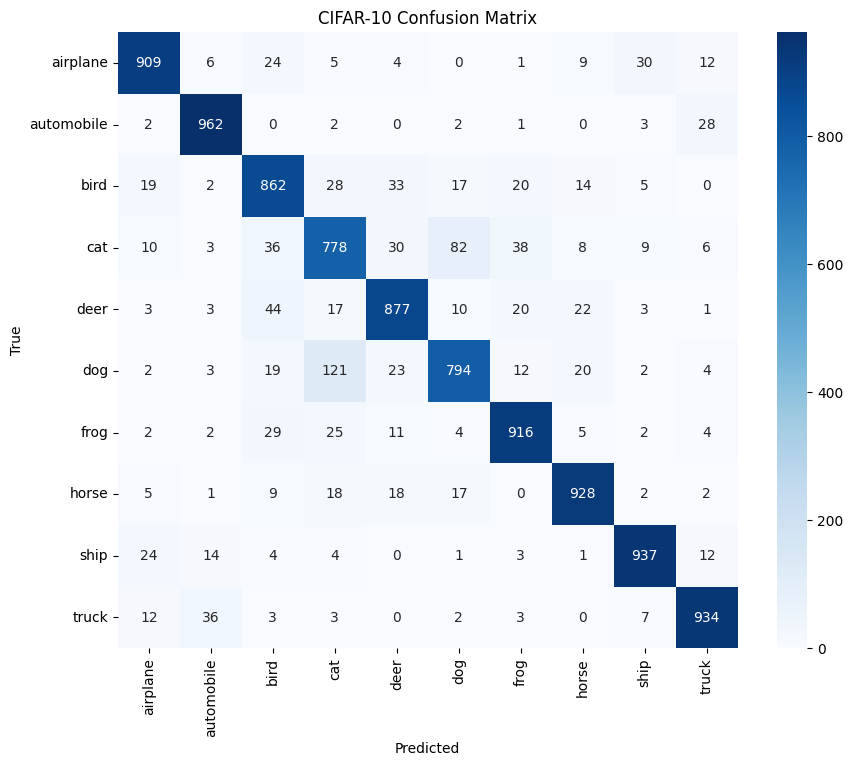

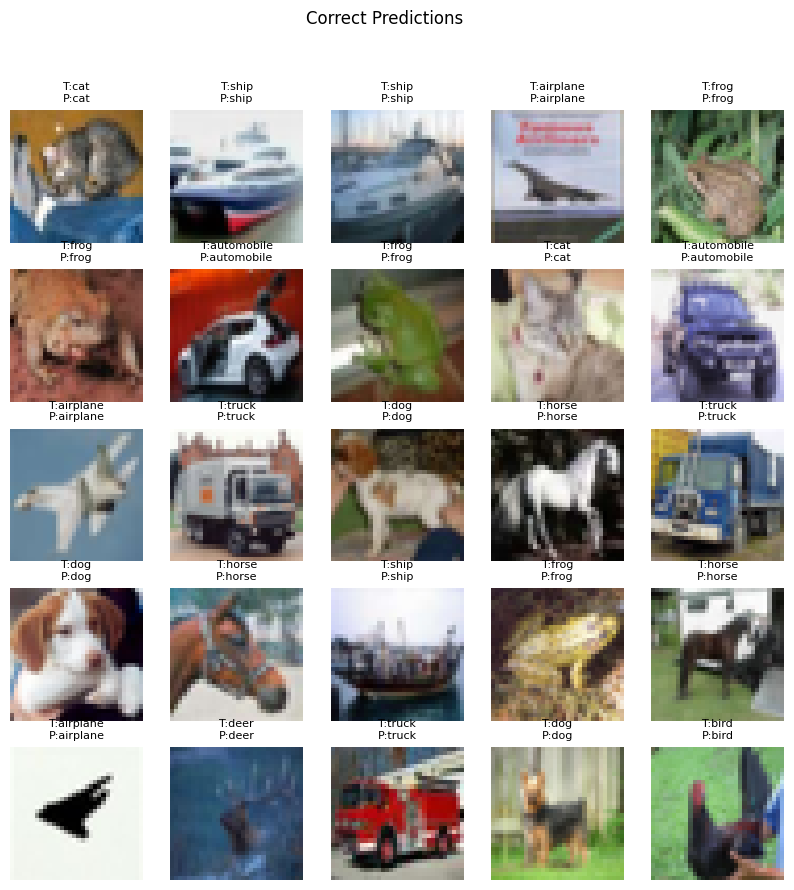

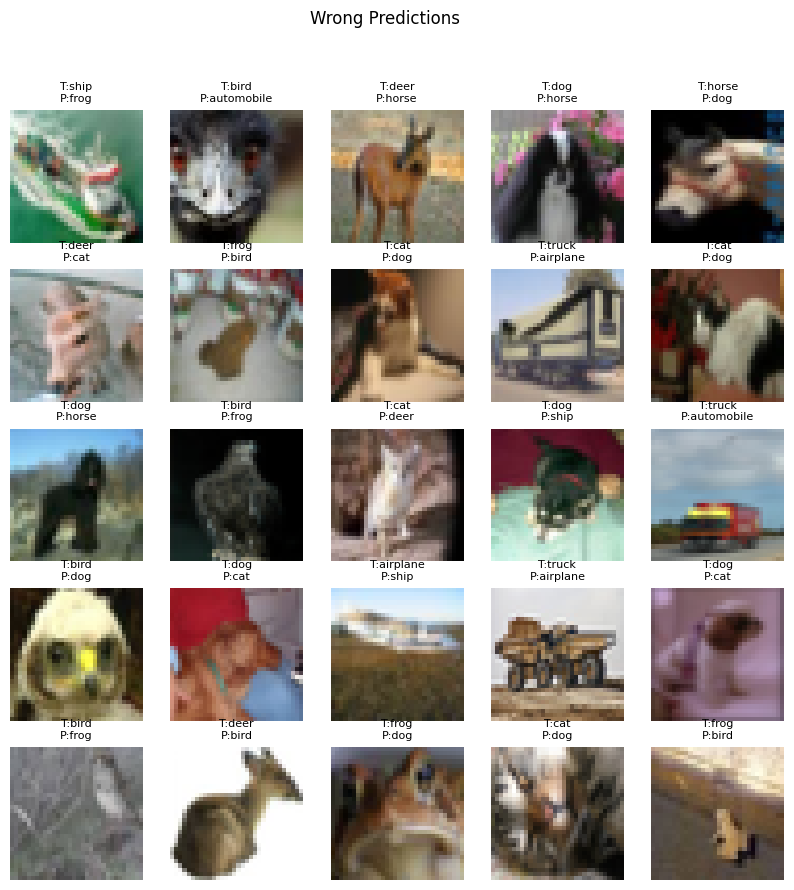

In [12]:

import seaborn as sns
from sklearn.metrics import confusion_matrix

# =========================
# Load CIFAR-10
# =========================
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.cifar10.load_data()

x_val = x_val.astype("float32") / 255.0
y_val = y_val.squeeze()

class_names = [
    'airplane','automobile','bird','cat','deer',
    'dog','frog','horse','ship','truck'
]

# =========================
# Load BEST trained model from disk
# =========================
model = tf.keras.models.load_model("best_cifar10_model.keras")

# =========================
# Predict on validation set
# =========================
pred_probs = model.predict(x_val, batch_size=256)
pred_labels = np.argmax(pred_probs, axis=1)

# =========================
# Confusion Matrix
# =========================
cm = confusion_matrix(y_val, pred_labels)

plt.figure(figsize=(10,8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("CIFAR-10 Confusion Matrix")
plt.show()

# =========================
# Correct vs Wrong samples
# =========================
correct_idx = np.where(pred_labels == y_val)[0]
wrong_idx   = np.where(pred_labels != y_val)[0]

def show_images(indices, title):
    plt.figure(figsize=(10,10))
    for i, idx in enumerate(indices[:25]):
        plt.subplot(5,5,i+1)
        plt.imshow(x_val[idx])
        plt.title(
            f"T:{class_names[y_val[idx]]}\nP:{class_names[pred_labels[idx]]}",
            fontsize=8
        )
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

show_images(correct_idx, "Correct Predictions")
show_images(wrong_idx, "Wrong Predictions")

# =========================
# Predict on custom image (LOCAL FILE)
# =========================
def predict_image(path):
    img = tf.keras.utils.load_img(path, target_size=(32,32))
    img = tf.keras.utils.img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    probs = model.predict(img)
    pred  = np.argmax(probs, axis=1)[0]

    plt.imshow(img[0])
    plt.title(class_names[pred])
    plt.axis("off")
    plt.show()

# Example:
# predict_image("/kaggle/input/your_image.png")


In [22]:
def model(input_shape):
    input_img=tf.keras.Input(shape=input_shape)
    x=data_augmentation(input_img)
    Z1=tf.keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='same')(x)
    B1=tf.keras.layers.BatchNormalization()(Z1)
    A1=tf.keras.layers.ReLU()(B1)
    Z2=tf.keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='same')(A1)
    B2=tf.keras.layers.BatchNormalization()(Z2)
    A2=tf.keras.layers.ReLU()(B2)
    P1=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(A2)

    Z3=tf.keras.layers.Conv2D(filters=128,kernel_size=3,strides=(1,1),padding='same')(P1)
    B3=tf.keras.layers.BatchNormalization()(Z3)
    A3=tf.keras.layers.ReLU()(B3)
    Z4=tf.keras.layers.Conv2D(filters=128,kernel_size=3,strides=(1,1),padding='same')(A3)
    B4=tf.keras.layers.BatchNormalization()(Z4)
    A4=tf.keras.layers.ReLU()(B4)
    P2=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(A4)
    
    Z5=tf.keras.layers.Conv2D(filters=256,kernel_size=3,strides=(1,1),padding='same')(P2)
    B5=tf.keras.layers.BatchNormalization()(Z5)
    A5=tf.keras.layers.ReLU()(B5)
    Z6=tf.keras.layers.Conv2D(filters=256,kernel_size=3,strides=(1,1),padding='same')(A5)
    B6=tf.keras.layers.BatchNormalization()(Z6)
    A6=tf.keras.layers.ReLU()(B6)
    Z7=tf.keras.layers.Conv2D(filters=256,kernel_size=3,strides=(1,1),padding='same')(A6)
    B7=tf.keras.layers.BatchNormalization()(Z7)
    A7=tf.keras.layers.ReLU()(B7)
    P3=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(A7)

    Z8=tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=(1,1),padding='same')(P3)
    B8=tf.keras.layers.BatchNormalization()(Z8)
    A8=tf.keras.layers.ReLU()(B8)
    Z9=tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=(1,1),padding='same')(A8)
    B9=tf.keras.layers.BatchNormalization()(Z9)
    A9=tf.keras.layers.ReLU()(B9)
    Z10=tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=(1,1),padding='same')(A9)
    B10=tf.keras.layers.BatchNormalization()(Z10)
    A10=tf.keras.layers.ReLU()(B10)
    P4=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(A10)
    
    Z11=tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=(1,1),padding='same')(P4)
    B11=tf.keras.layers.BatchNormalization()(Z11)
    A11=tf.keras.layers.ReLU()(B11)
    Z12=tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=(1,1),padding='same')(A11)
    B12=tf.keras.layers.BatchNormalization()(Z12)
    A12=tf.keras.layers.ReLU()(B12)
    Z13=tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=(1,1),padding='same')(A12)
    B13=tf.keras.layers.BatchNormalization()(Z13)
    A13=tf.keras.layers.ReLU()(B13)
    P5=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(A13)

    F=GlobalAveragePooling2D()(P5)
    

    output = tf.keras.layers.Dense(
    units=100,
    activation='softmax',
    dtype='float32'  
    )(F)

    
    model=tf.keras.Model(inputs=input_img,outputs=output)
    return model

In [21]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1), # Reduced from 0.2
    tf.keras.layers.RandomZoom(0.1),     # Reduced from 0.25
], name="moderate_augmentation")


In [23]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

batch_size = 128

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)) \
    .shuffle(50000) \
    .batch(batch_size) \
    .prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)) \
    .batch(batch_size) \
    .prefetch(tf.data.AUTOTUNE)

# build model
model_instance = model(input_shape=(32, 32, 3))

# optimizer
optimizer = tf.keras.optimizers.AdamW(
    learning_rate=1e-3,
    weight_decay=1e-4
)

# compile
model_instance.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        tf.keras.metrics.SparseCategoricalAccuracy(name="acc"),
        tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5, name="acc_top5"),
        tf.keras.metrics.SparseTopKCategoricalAccuracy(k=10, name="acc_top10")
    ]
)
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="best_cifar100_model.keras",
        monitor="val_acc",
        save_best_only=True,
        save_weights_only=False,
        verbose=1
    ),
    tf.keras.callbacks.CSVLogger(
        filename="cifar100_training_log.csv",
        append=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.3,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

# train
history = model_instance.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=callbacks
)

# reload best model anytime
best_model = tf.keras.models.load_model("best_cifar100_model.keras")


Epoch 1/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - acc: 0.0292 - acc_top10: 0.2142 - acc_top5: 0.1213 - loss: 4.5742
Epoch 1: val_acc improved from -inf to 0.03020, saving model to best_cifar100_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 70ms/step - acc: 0.0293 - acc_top10: 0.2146 - acc_top5: 0.1216 - loss: 4.5729 - val_acc: 0.0302 - val_acc_top10: 0.2481 - val_acc_top5: 0.1413 - val_loss: 5.0457 - learning_rate: 0.0010
Epoch 2/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - acc: 0.0902 - acc_top10: 0.4560 - acc_top5: 0.3036 - loss: 3.8747
Epoch 2: val_acc improved from 0.03020 to 0.08810, saving model to best_cifar100_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - acc: 0.0902 - acc_top10: 0.4561 - acc_top5: 0.3037 - loss: 3.8743 - val_acc: 0.0881 - val_acc_top10: 0.4149 - val_acc_top5: 0.2870 - val_loss: 5.2268 - learning_rate: 0.0010
Epoch 3/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - acc: 0.1332 - acc_top10: 0.5551 - acc_top5: 0.3992 - loss: 3.5540
Epoch 3: val_acc

In [24]:
best_model = tf.keras.models.load_model("best_cifar100_model.keras")

history2 = best_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)


Epoch 1/20
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - acc: 0.4697 - acc_top10: 0.8792 - acc_top5: 0.7902 - loss: 1.9382
Epoch 1: val_acc did not improve from 0.38030
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - acc: 0.4697 - acc_top10: 0.8792 - acc_top5: 0.7902 - loss: 1.9382 - val_acc: 0.3693 - val_acc_top10: 0.8093 - val_acc_top5: 0.6952 - val_loss: 2.5038 - learning_rate: 0.0010
Epoch 2/20
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - acc: 0.4853 - acc_top10: 0.8940 - acc_top5: 0.8056 - loss: 1.8401
Epoch 2: val_acc improved from 0.38030 to 0.41180, saving model to best_cifar100_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - acc: 0.4853 - acc_top10: 0.8940 - acc_top5: 0.8056 - loss: 1.8401 - val_acc: 0.4118 - val_acc_top10: 0.8207 - val_acc_top5: 0.7210 - val_loss: 2.3790 - learning_rate: 0.0010
Epoch 3/20
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - acc: 0.5072 - acc_top10: 0.9024 - acc_top5: 0.8226 - loss: 1.7531
Epoch 3: val_acc improved from 0.41180 to 0.43130, saving mo

In [25]:
best_model = tf.keras.models.load_model("best_cifar100_model.keras")

In [26]:
!ls -lh


total 564M
-rw-r--r-- 1 root root 283M Feb  5 17:23 best_cifar100_model.keras
-rw-r--r-- 1 root root 282M Feb  5 16:32 best_cifar10_model.keras
-rw-r--r-- 1 root root 7.2K Feb  5 17:24 cifar100_training_log.csv
-rw-r--r-- 1 root root  12K Feb  5 16:41 cifar10_training_log.csv


In [27]:
!mv best_cifar100_model.keras /kaggle/working/


mv: 'best_cifar100_model.keras' and '/kaggle/working/best_cifar100_model.keras' are the same file


In [28]:
from IPython.display import FileLink

FileLink("best_cifar100_model.keras")


/kaggle/working/best_cifar100_model.keras

In [29]:
!ls -lh /kaggle/working/


total 564M
-rw-r--r-- 1 root root 283M Feb  5 17:23 best_cifar100_model.keras
-rw-r--r-- 1 root root 282M Feb  5 16:32 best_cifar10_model.keras
-rw-r--r-- 1 root root 7.2K Feb  5 17:24 cifar100_training_log.csv
-rw-r--r-- 1 root root  12K Feb  5 16:41 cifar10_training_log.csv
